In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [6]:
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [8]:
cm

array([[52,  6],
       [ 3, 19]])

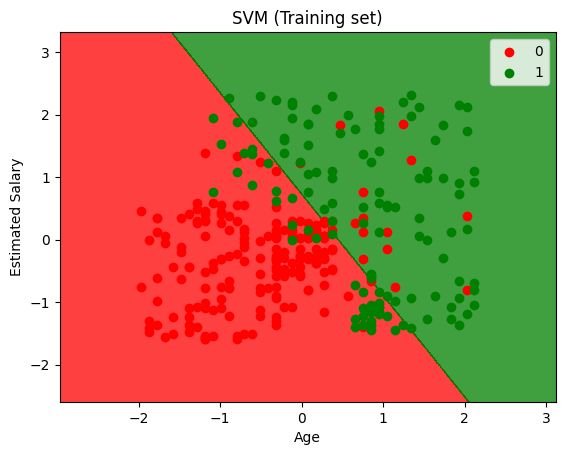

In [10]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, and classifier are defined
X_set, y_set = X_train, y_train

# Create a meshgrid for the decision boundary
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Plot the decision boundary with contourf
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Set the limits for the plot
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the training points with different colors for each class
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j)  # Use 'color' instead of 'c'

# Add labels and title
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Show the plot
plt.show()

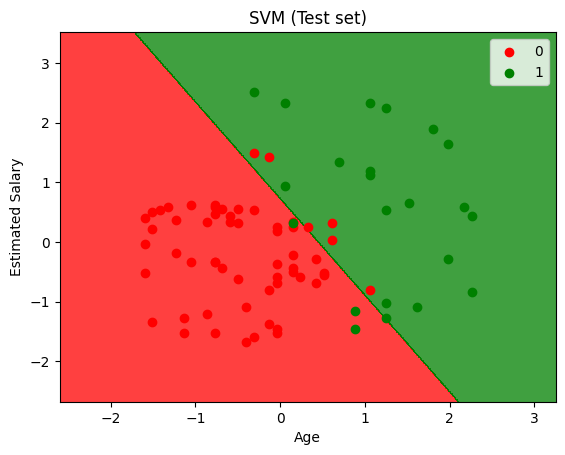

In [11]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, and classifier are defined
X_set, y_set = X_test, y_test

# Create a meshgrid for the decision boundary
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Plot the decision boundary with contourf
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Set the limits for the plot
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the training points with different colors for each class
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j)  # Use 'color' instead of 'c'

# Add labels and title
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Show the plot
plt.show()